# Table Of Contents
* [Explritory Data Analysis](#EDA)
* [Metrics Discussion](#metric)
* [Base Modeling](#Iter1)
* [Second Iteration](#Iter2)
* [Third Iteration](#Iter3)
* [Results](#IterationResults)
* [Conclusions](#Conclusions)

This notebook is the first part used for a blog post found [here](https://elibrunette.medium.com/is-your-business-going-bankrupt-f42fec3c243d)

# Exploritory Data Analysis <a class="anchor" id="EDA"></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import math
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score
import seaborn as sns

In [2]:
# read in the csv 
bankrupt_df = pd.read_csv('./data/data.csv')

In [3]:
# model paths 
model_output_path_iteration_one = './models/iter_one_a'
model_output_path_iteration_two = './models/iter_two'
model_output_path_iteration_three = './models/iter_three'

In [4]:
#make sure we read in the data correctly
bankrupt_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
# looking into if there is anything strange in the dataset
bankrupt_df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
# see the datatypes of each of the columns
# see what the column is, IF it isn't a float
for column in bankrupt_df.columns:
    if bankrupt_df[column].dtype != float:
        print("Column name: {}\nColumnType: {}".format(column, bankrupt_df[column].dtype))

Column name: Bankrupt?
ColumnType: int64
Column name:  Liability-Assets Flag
ColumnType: int64
Column name:  Net Income Flag
ColumnType: int64


Noting that there isn't any strings or anything in the dataset. Making this dataset EXTREMELY good for modeling. No data processing required for the current dataset. 

In [7]:
# check for weird values in each column
for column in bankrupt_df.columns: 
    unique_values = bankrupt_df[column].unique()
    if len(unique_values) <= 2: 
        print("Column {} has less than 2 unique values {}".format(column, unique_values))

Column Bankrupt? has less than 2 unique values [1 0]
Column  Liability-Assets Flag has less than 2 unique values [0 1]
Column  Net Income Flag has less than 2 unique values [1]


Still no values that are weird for modeling, except the net income flag that has only one value. So dropping column because it isn't adding anything to the dataset. 

In [8]:
# dropping the Net Income Flag because it is all the same value, and won't be adding any extra value to modeling. 
bankrupt_df = bankrupt_df.drop([' Net Income Flag'], axis=1)

Bankrupt?


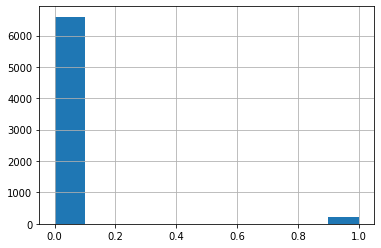

 ROA(C) before interest and depreciation before interest


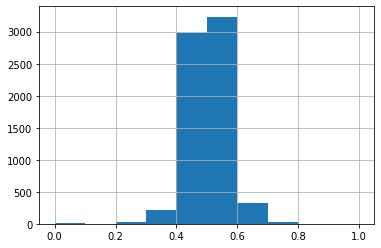

 ROA(A) before interest and % after tax


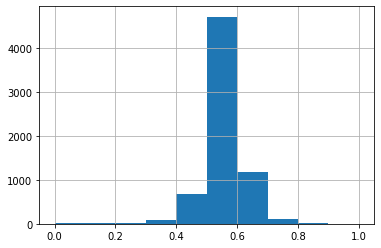

 ROA(B) before interest and depreciation after tax


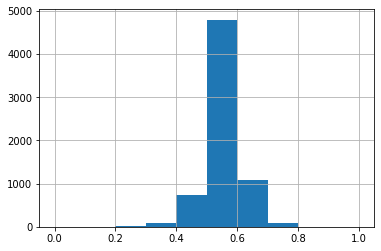

 Operating Gross Margin


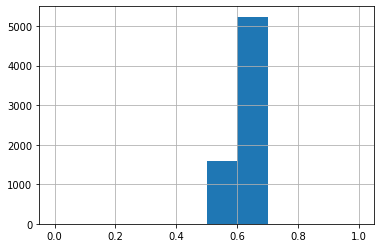

 Realized Sales Gross Margin


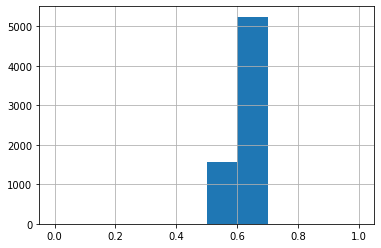

 Operating Profit Rate


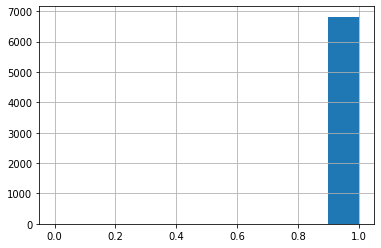

 Pre-tax net Interest Rate


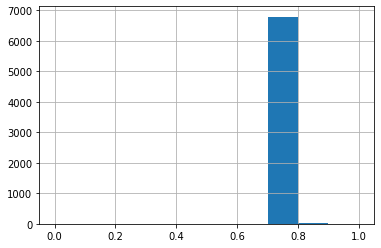

 After-tax net Interest Rate


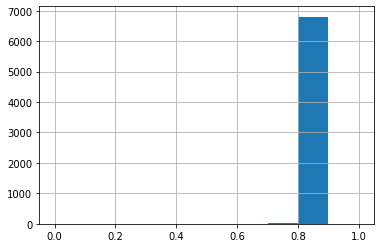

 Non-industry income and expenditure/revenue


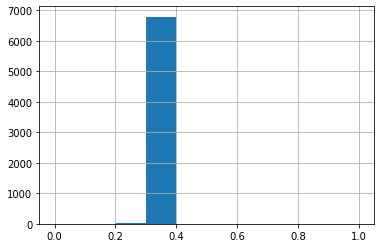

 Continuous interest rate (after tax)


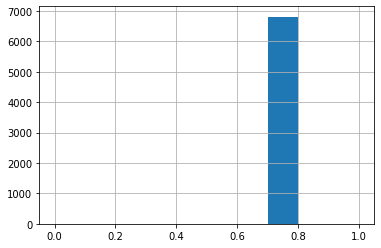

 Operating Expense Rate


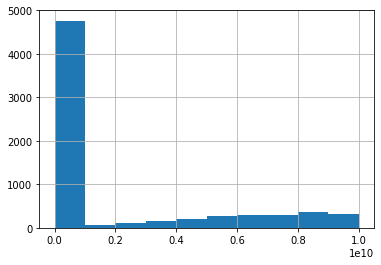

 Research and development expense rate


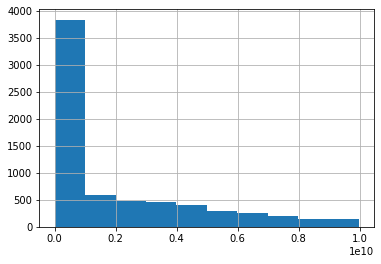

 Cash flow rate


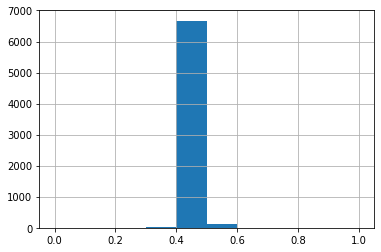

 Interest-bearing debt interest rate


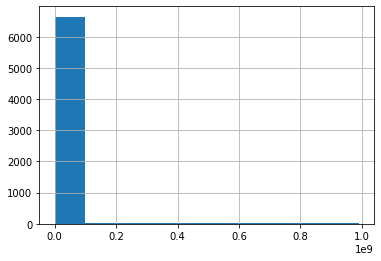

 Tax rate (A)


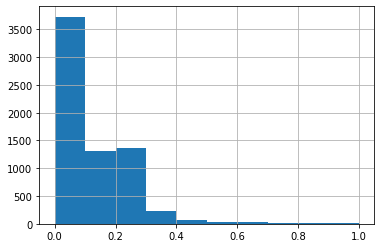

 Net Value Per Share (B)


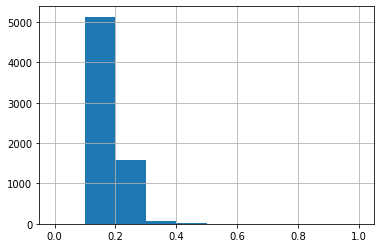

 Net Value Per Share (A)


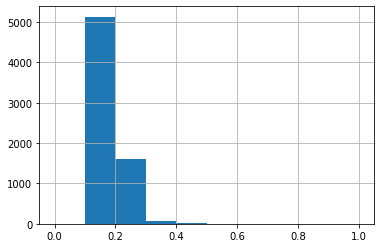

 Net Value Per Share (C)


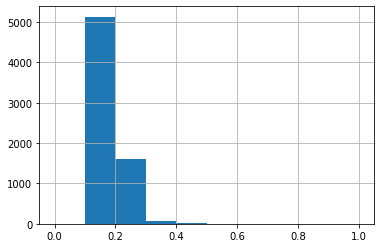

 Persistent EPS in the Last Four Seasons


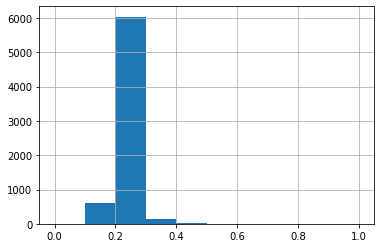

 Cash Flow Per Share


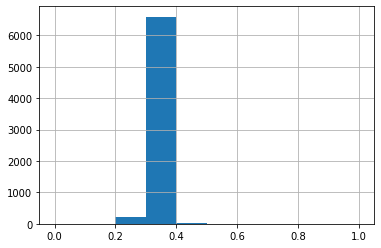

 Revenue Per Share (Yuan ¥)


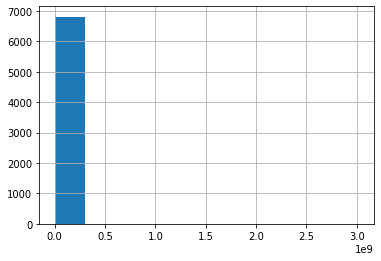

 Operating Profit Per Share (Yuan ¥)


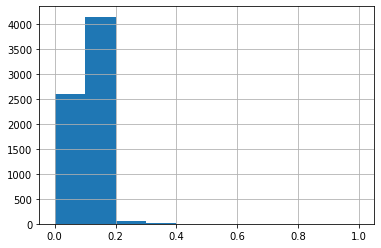

 Per Share Net profit before tax (Yuan ¥)


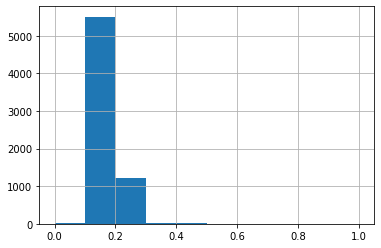

 Realized Sales Gross Profit Growth Rate


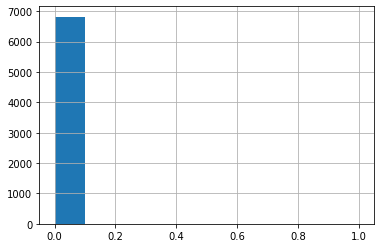

 Operating Profit Growth Rate


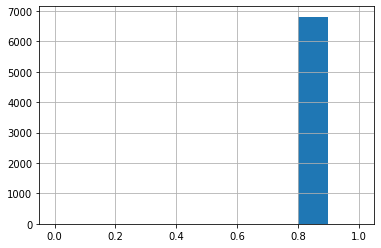

 After-tax Net Profit Growth Rate


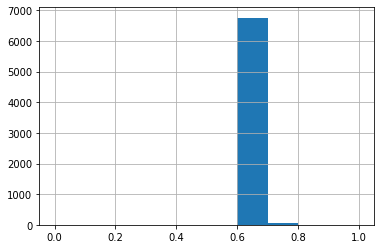

 Regular Net Profit Growth Rate


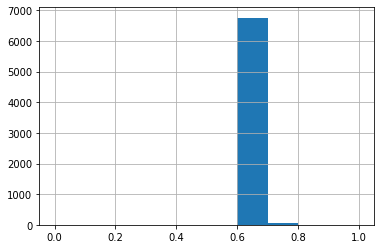

 Continuous Net Profit Growth Rate


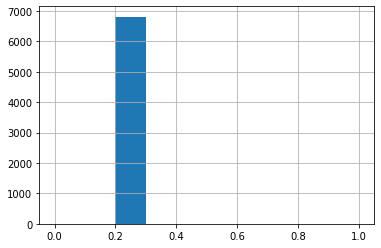

 Total Asset Growth Rate


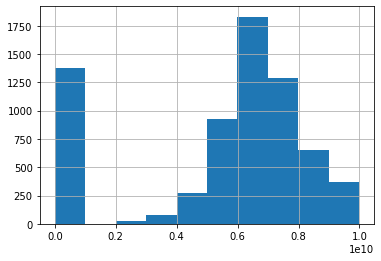

 Net Value Growth Rate


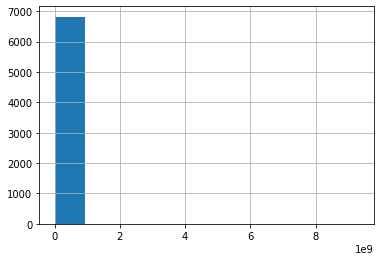

 Total Asset Return Growth Rate Ratio


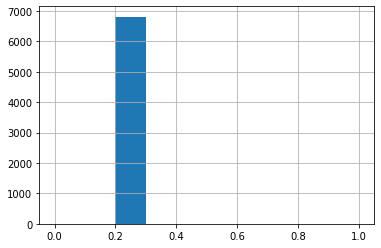

 Cash Reinvestment %


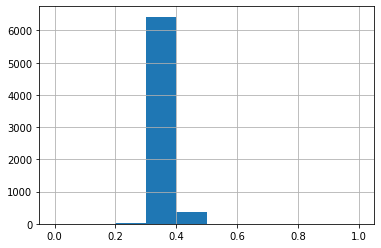

 Current Ratio


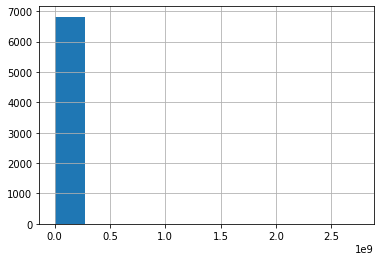

 Quick Ratio


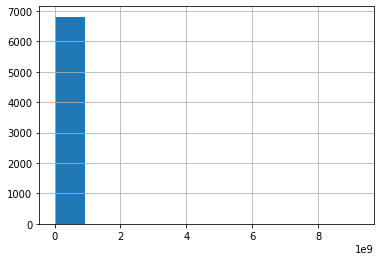

 Interest Expense Ratio


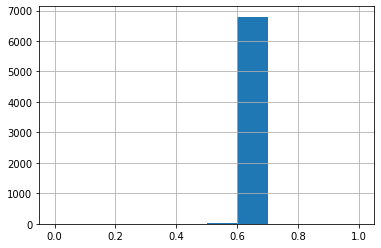

 Total debt/Total net worth


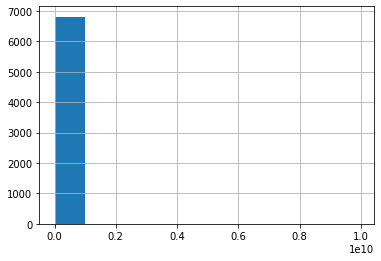

 Debt ratio %


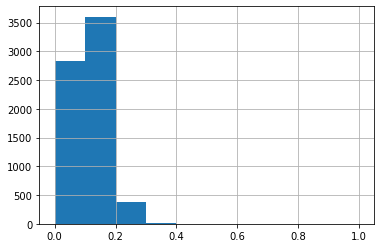

 Net worth/Assets


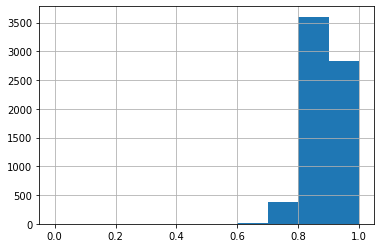

 Long-term fund suitability ratio (A)


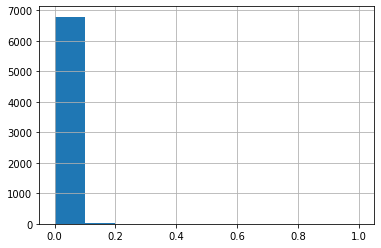

 Borrowing dependency


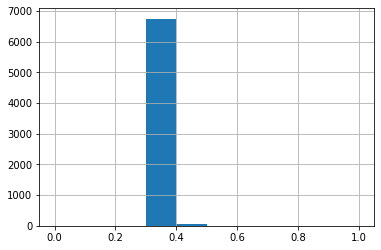

 Contingent liabilities/Net worth


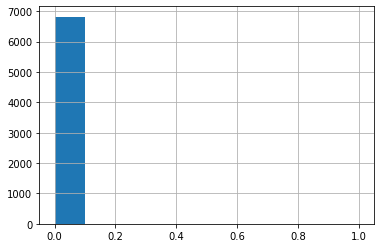

 Operating profit/Paid-in capital


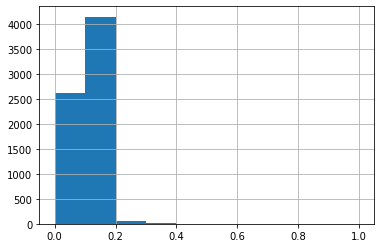

 Net profit before tax/Paid-in capital


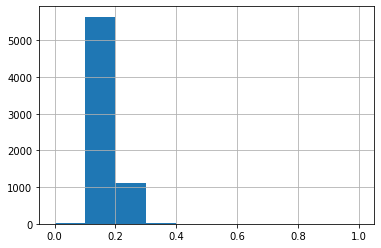

 Inventory and accounts receivable/Net value


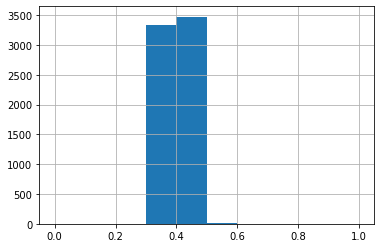

 Total Asset Turnover


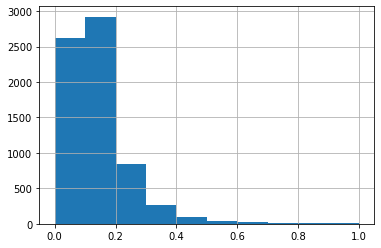

 Accounts Receivable Turnover


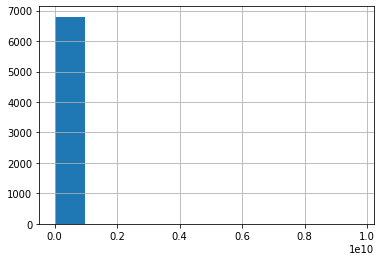

 Average Collection Days


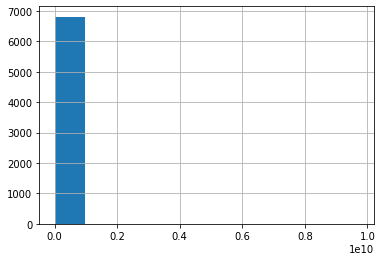

 Inventory Turnover Rate (times)


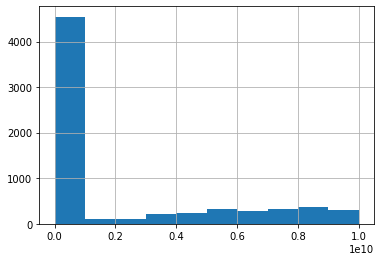

 Fixed Assets Turnover Frequency


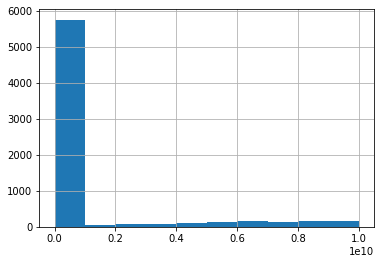

 Net Worth Turnover Rate (times)


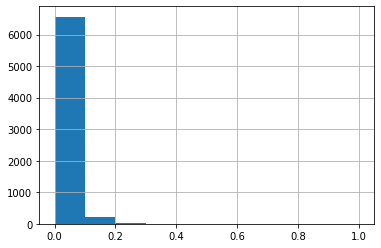

 Revenue per person


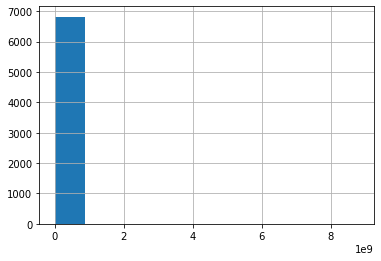

 Operating profit per person


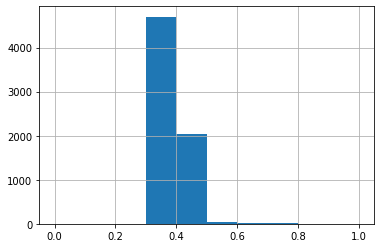

 Allocation rate per person


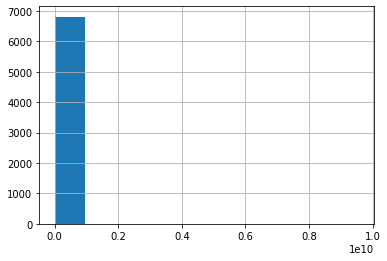

 Working Capital to Total Assets


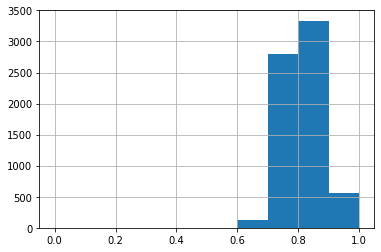

 Quick Assets/Total Assets


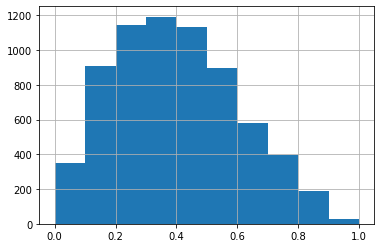

 Current Assets/Total Assets


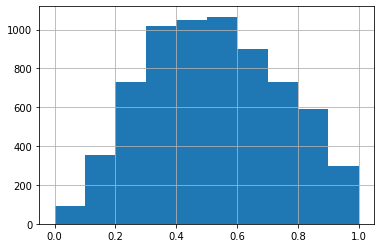

 Cash/Total Assets


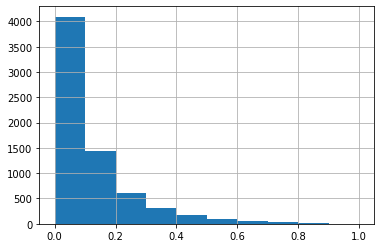

 Quick Assets/Current Liability


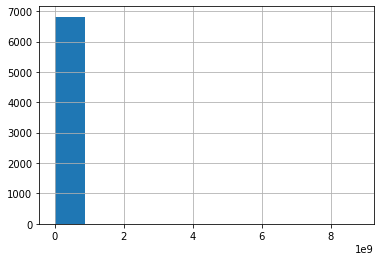

 Cash/Current Liability


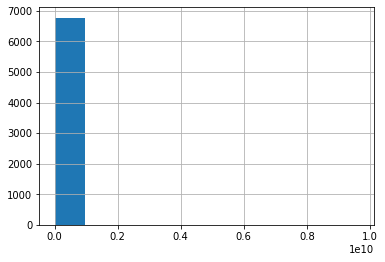

 Current Liability to Assets


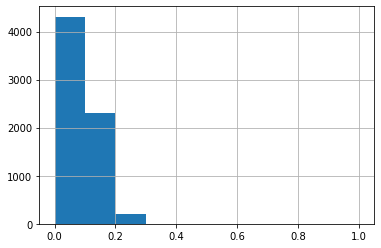

 Operating Funds to Liability


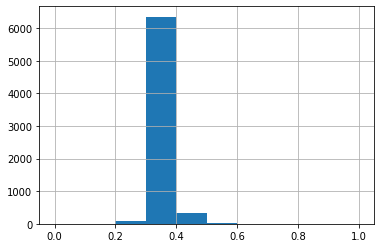

 Inventory/Working Capital


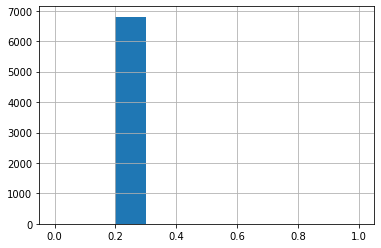

 Inventory/Current Liability


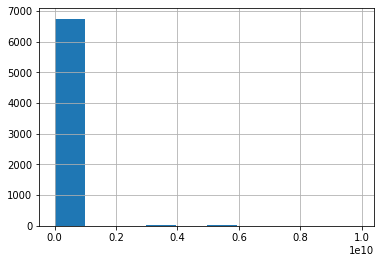

 Current Liabilities/Liability


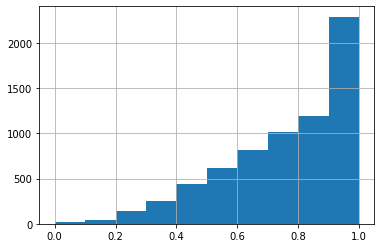

 Working Capital/Equity


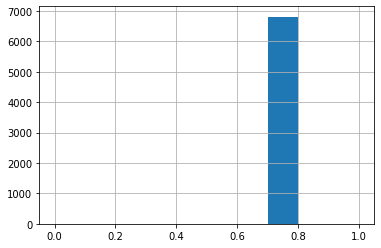

 Current Liabilities/Equity


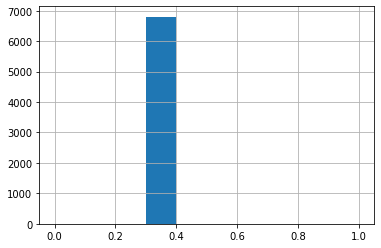

 Long-term Liability to Current Assets


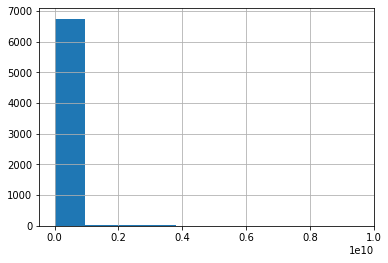

 Retained Earnings to Total Assets


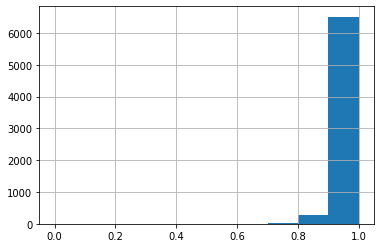

 Total income/Total expense


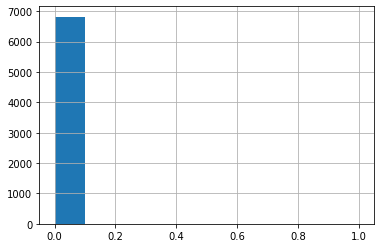

 Total expense/Assets


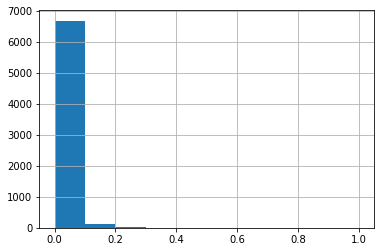

 Current Asset Turnover Rate


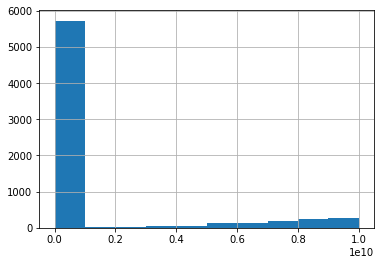

 Quick Asset Turnover Rate


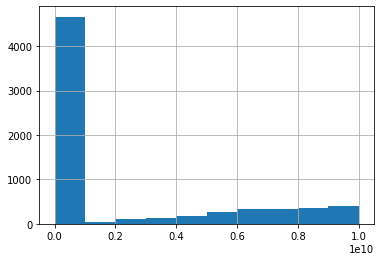

 Working capitcal Turnover Rate


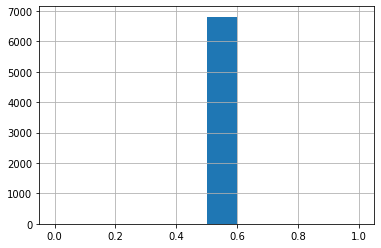

 Cash Turnover Rate


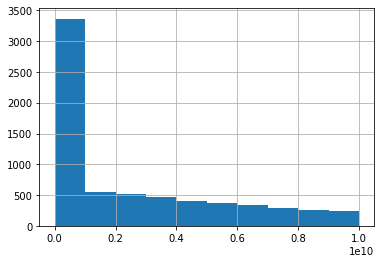

 Cash Flow to Sales


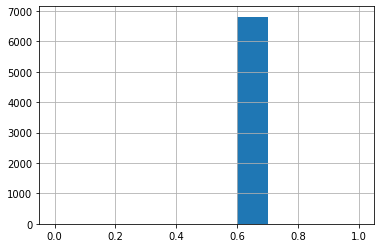

 Fixed Assets to Assets


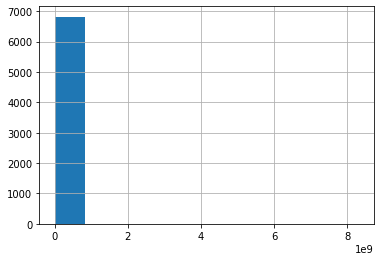

 Current Liability to Liability


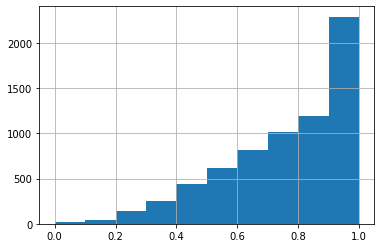

 Current Liability to Equity


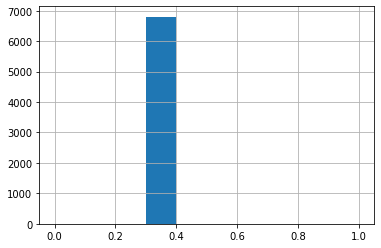

 Equity to Long-term Liability


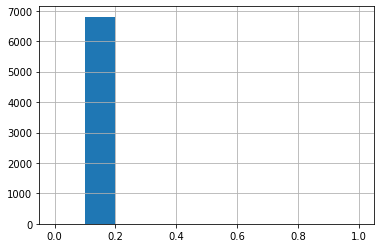

 Cash Flow to Total Assets


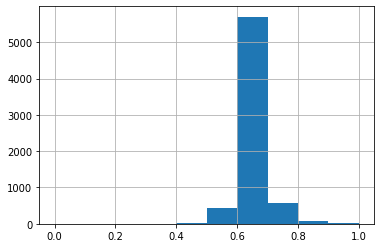

 Cash Flow to Liability


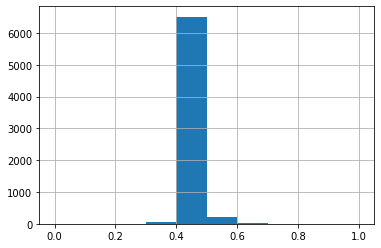

 CFO to Assets


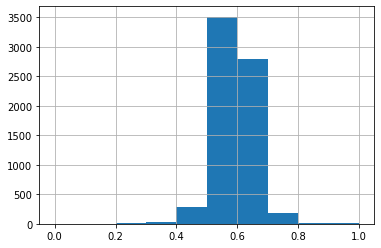

 Cash Flow to Equity


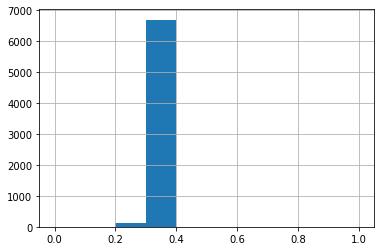

 Current Liability to Current Assets


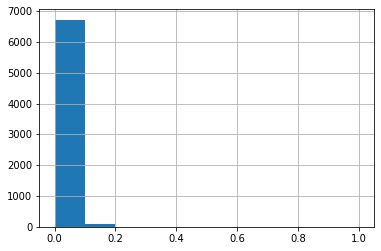

 Liability-Assets Flag


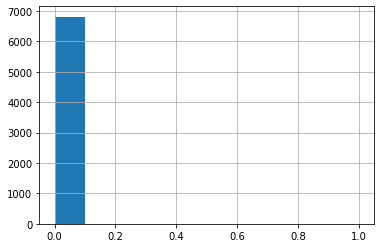

 Net Income to Total Assets


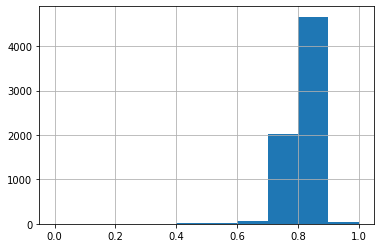

 Total assets to GNP price


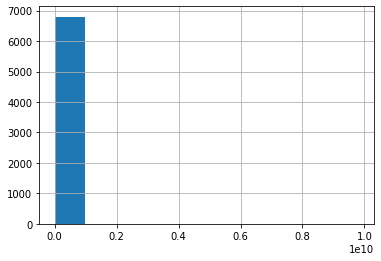

 No-credit Interval


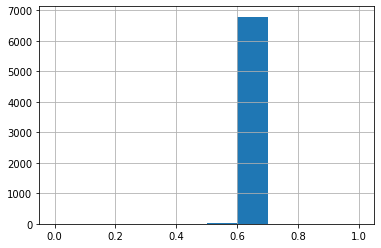

 Gross Profit to Sales


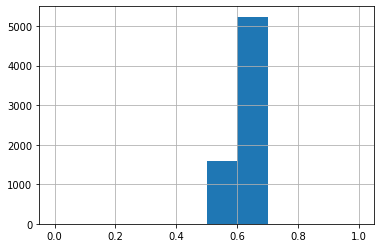

 Net Income to Stockholder's Equity


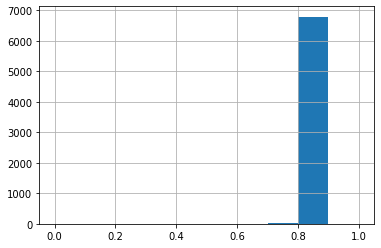

 Liability to Equity


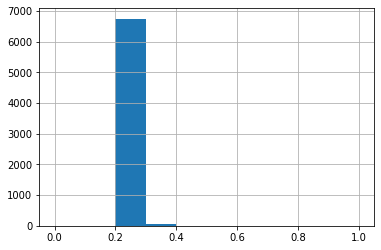

 Degree of Financial Leverage (DFL)


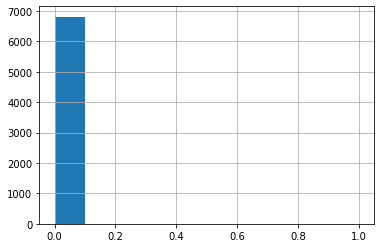

 Interest Coverage Ratio (Interest expense to EBIT)


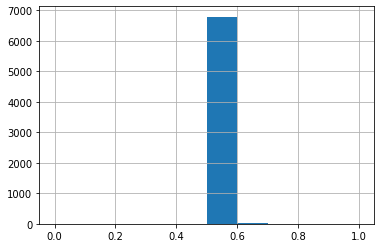

 Equity to Liability


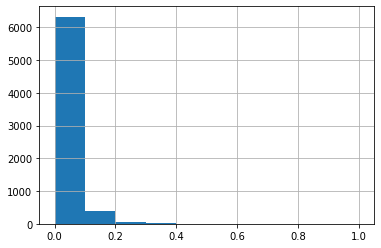

In [9]:
# what does the distribution for the column we want to predict look like? 
for column in bankrupt_df.columns: 
    print(column)
    hist = bankrupt_df[column].hist()
    plt.show()

Interesting results, particluarly the 'Total Asset Growth Rate' column. Which we should look into. 

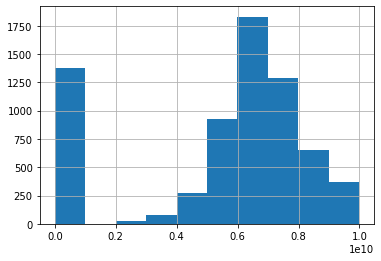

In [10]:
bankrupt_df[' Total Asset Growth Rate'].hist()
plt.show()

Intesting plot, becuase it shows a histogram that is normally distributed, but there is a huge amount of values between [0, 0.1)

In [11]:
# what values are there that could cause such a scued distribution? 
bankrupt_df[bankrupt_df[' Total Asset Growth Rate'] < 0.1][' Total Asset Growth Rate'].unique()

array([0.00011282, 0.00010705, 0.00010147, 0.00010114, 0.00012179,
       0.00010015, 0.00013823, 0.00017187, 0.00011466, 0.00010279,
       0.00012797, 0.00013194, 0.00010502, 0.00011371, 0.00013108,
       0.00010195, 0.00012957, 0.00012245, 0.00021751, 0.00011207,
       0.0001026 , 0.00012172, 0.00010025, 0.00014572, 0.00010089,
       0.00010379, 0.00011528, 0.00011006, 0.00015797, 0.00010163,
       0.00013089, 0.00013101, 0.00010436, 0.0001372 , 0.00010384,
       0.00015998, 0.0001526 , 0.000189  , 0.00012282, 0.00011506,
       0.00010709, 0.00018493, 0.00010143, 0.00017083, 0.00015359,
       0.00010934, 0.00018776, 0.00027555, 0.00014175, 0.00035802,
       0.00010567, 0.00010166, 0.00010429, 0.00017159, 0.00018326,
       0.00048316, 0.0001333 , 0.00012348, 0.00012747, 0.00013988,
       0.00083524, 0.00010922, 0.00015005, 0.00030764, 0.00013315,
       0.00010263, 0.00011428, 0.00021966, 0.00013678, 0.00072237,
       0.00016339, 0.00020976, 0.00011066, 0.00012756, 0.00011

 look like a ton of values really close to 0. 

# Now onto some basic modeling! <a class="anchor" id="Iter1"></a>
### Models I want to try: 
1. Linear Regression
    1. Gonna try this one, even though the data doesn't appear to be linear for most of the aspects even if it is linearly distributed. 
2. Decision Tree
3. Random Forest
4. SVM 
5. XGBoost

In [12]:
# SKLearn Imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import constants
import pickle

In [13]:
# set up training datasets
def get_split(df):
    """ 
    Splits the dataset into train and test based on a random state and test size
    
    input: A dataframe with the data to split and prepare for modeling 
    dtype: pd.DataFrame
    returns: 
    * X_train: The dataframe that contains the training data for models 
    * X_test: The dataframe that contains the testing data for models 
    * y_train: The classifaction training data for training models
    * y_test: THe classification test data for testing models
    """
    X = df.drop('Bankrupt?', axis=1)
    y = df['Bankrupt?']
    return train_test_split(X,y,random_state=42, test_size=.3)

In [14]:
def train_all_models(df, base_model_output_path):
    """
    Trains the models outlined in the constants file. With those models and saves/checks if the models once they are done with training. 
    If the model exists, then laods the dataset and returns that to save unecessary training. 
    
    inputs: 
    * df: Dataframe representing the data the training for this project. 
    * base_model_output_path: The string that is a relative file path but not the model names for saving datasets. THe model names will be appended 
    dtypes inputs: 
    * df: pd.DataFrame
    * base_model_output_path: string
    returns: A trained list of models that other functions use for evaluation. 
    dtype return: List of GridSearchCV objects
    """
    model_names = constants.model_names
    models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), GradientBoostingClassifier()] 
    trained_models = []
    for i in range(len(models)):
        X_train, X_test, y_train, y_test = get_split(df)
        model_path = "{}_{}.pkl".format(base_model_output_path, model_names[i])
        # checks if model has been trained. If it has, then it loads the dataset. 
        # If it hasn't been trained, then it trains it. 
        if os.path.isfile(model_path):
            print("Model {} exists at filepath {}.".format(model_names[i], model_path))
            model = pickle.load( open( model_path, "rb" ) )
            trained_models.append(model)
        else: 
            print("Model {} is being trained.".format(model_names[i]))
            parameters = constants.model_parameters_dict[model_names[i]]
            model = GridSearchCV(models[i], param_grid=parameters)
            model.fit(X_train, y_train)
            pickle.dump(model, open(model_path, "wb"))
            trained_models.append(model)
    return trained_models
trained_models = train_all_models(bankrupt_df, model_output_path_iteration_one)

Model LogisticRegression exists at filepath ./models/iter_one_a_LogisticRegression.pkl.
Model DecisionTreeClassifier exists at filepath ./models/iter_one_a_DecisionTreeClassifier.pkl.
Model RandomForestClassifier exists at filepath ./models/iter_one_a_RandomForestClassifier.pkl.
Model SVC exists at filepath ./models/iter_one_a_SVC.pkl.
Model GradientBoostingClassifier exists at filepath ./models/iter_one_a_GradientBoostingClassifier.pkl.


In [15]:
for model in trained_models: 
    print(model.best_params_)

{'multi_class': 'auto', 'penalty': 'l1'}
{'criterion': 'entropy', 'splitter': 'best'}
{'criterion': 'gini', 'n_estimators': 180}
{'kernel': 'rbf', 'max_iter': 500}
{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}


In [16]:
def plot_roc_curve(actual, pred, model_name):
    fpr, tpr, thresholds = roc_curve(actual.tolist(), pred.tolist())
    plt.figure()

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve for {}'.format(model_name))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)

In [17]:
def evaluate_model(X_test, y_test,  trained_models):
    """ 
    Evaluates the model by printing the ROC curve as a graph, the confusion matrix and the report values for classification. 
    
    inputs: 
    * X_test: pandas DataFrame representing the X input test data for testing the models
    * y_test: pandas DataFrame representing the y output test data for testing the models 
    * trained_models: list of trained GridSearchCV objects
    dtypes inputs: 
    * X_test: pd.DataFrame
    * y_test: pd.DataFrame
    * trained_models: list of gridSearchCV objects
    
    return: A list of resulting F1 Scores for the trained models
    dtype return: list of doubles
    """
    report_list = []
    for i in range(len(trained_models)): 
        predictions = trained_models[i].predict(X_test)
        confusion = confusion_matrix(y_test, predictions)
        report = classification_report(y_test, predictions)
        F1_score = f1_score(y_test, predictions)
        plot_roc_curve(y_test, predictions, constants.model_names[i])
        print(constants.model_names[i])
        plt.show()
        print("Confusion Matrix: \n{}".format(confusion))
        print("Classification Report for {}:\n{}\n\n\n".format(constants.model_names[i], report))
        report_list.append(F1_score)
    return report_list

LogisticRegression


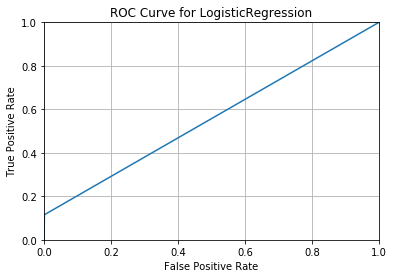

Confusion Matrix: 
[[1966    2]
 [  69    9]]
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.82      0.12      0.20        78

    accuracy                           0.97      2046
   macro avg       0.89      0.56      0.59      2046
weighted avg       0.96      0.97      0.95      2046




DecisionTreeClassifier


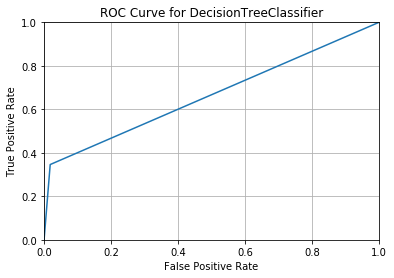

Confusion Matrix: 
[[1932   36]
 [  51   27]]
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1968
           1       0.43      0.35      0.38        78

    accuracy                           0.96      2046
   macro avg       0.70      0.66      0.68      2046
weighted avg       0.95      0.96      0.96      2046




RandomForestClassifier


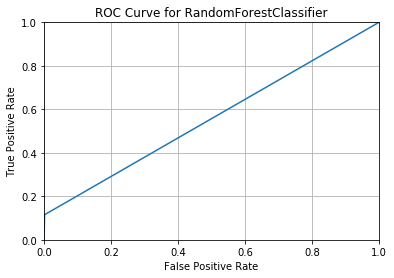

Confusion Matrix: 
[[1965    3]
 [  69    9]]
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.75      0.12      0.20        78

    accuracy                           0.96      2046
   macro avg       0.86      0.56      0.59      2046
weighted avg       0.96      0.96      0.95      2046




SVC


C:\Users\eliel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\eliel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


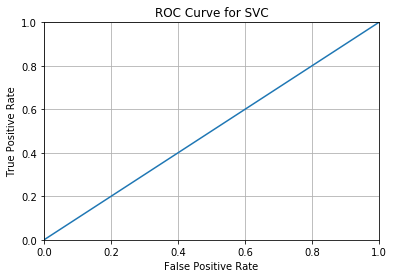

Confusion Matrix: 
[[1968    0]
 [  78    0]]
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1968
           1       0.00      0.00      0.00        78

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.93      0.96      0.94      2046




GradientBoostingClassifier


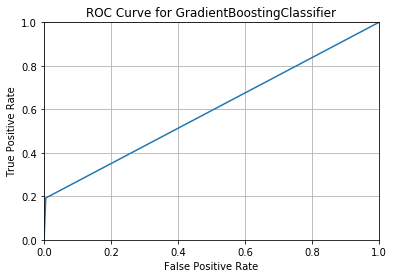

Confusion Matrix: 
[[1958   10]
 [  63   15]]
Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.60      0.19      0.29        78

    accuracy                           0.96      2046
   macro avg       0.78      0.59      0.64      2046
weighted avg       0.95      0.96      0.96      2046






In [18]:
X_train, X_test, y_train, y_test = get_split(bankrupt_df)
iteration_0_report = evaluate_model(X_test, y_test, trained_models)

# What metic do we want to maximize? <a class="anchor" id="metric"></a>
The metric that we want to maximize is F1 score. This is because the goal is to allow poeple to be aware that they might be at risk for losing their business even if they are not. Both Recall and F1 score are good metrics for unballances datasets as well. If they are not, and they decide to take steps to improve their business, then it will likely be good to improve a business anyway. So, looking for a way to streamline certain parts of their business would be helpful to increase their profit margine anyway. <br>
Based on the results from the report, it appears that The highest recall for if they went bankrupt is the decision tree classifying, even if the precision was really low for this particular model. <br>
Note: If the metric that we wanted to optimize was accuracy, then that model would be a simple logistic regression. This value recieved the highest precision, but we missed a lot of classifications, but the ones that they did guess, they got correct minus a couple of exceptions. 

In [19]:
def get_ten_most_important_features(train_models, training_data):
    """
    Takes the trained models, and returns the top 10 features. 
    
    Inputs: 
    * train_models: A list of trained GridSearchCV objects for the various models outlined in the constants file. 
    * training_data: The raw dataframe that was used for training
    dtype inputs: 
    * train_models: list of trained GridSearchCV objects
    * training_data: pd.DataFrame
    return: A dataframe representing the top ten features from trained models sorted based on weights.
    dtype return: pd.DataFrame
    """
    training_features = training_data.drop('Bankrupt?', axis=1).columns
    feature_importances = train_models[1].best_estimator_.feature_importances_
    feature_set_df = pd.DataFrame()
    feature_set_df['featureNames'] = training_features
    feature_set_df['featureWeight'] = feature_importances
    return feature_set_df.sort_values('featureWeight', ascending=False).head(10)

In [20]:
def plot_top_ten_features(top_10_df): 
    """ 
    Plots the top ten features of the passed in dataset. 
    
    input: DataFrame containing the top 10 feature names and weights for visualization
    dtype input: pd.DataFrame
    return: None
    dtype return: Doesn't return anything
    """
    sns.barplot(x='featureWeight', y='featureNames', data=top_10_df)
    plt.xlabel('Feature Weights From Best Trained Model')
    plt.ylabel('Feature Names From Best Trained Model')
    plt.title('What is the highest weighted features?')    

In [21]:
# What does the raw weight information look like? 
get_ten_most_important_features(trained_models, bankrupt_df)

,featureNames,featureWeight
39,Borrowing dependency,0.233772
29,Net Value Growth Rate,0.081092
8,Non-industry income and expenditure/revenue,0.074472
48,Fixed Assets Turnover Frequency,0.046959
54,Quick Assets/Total Assets,0.039302
2,ROA(B) before interest and depreciation after...,0.035842
56,Cash/Total Assets,0.030937
30,Total Asset Return Growth Rate Ratio,0.028206
33,Quick Ratio,0.023801
45,Accounts Receivable Turnover,0.022371


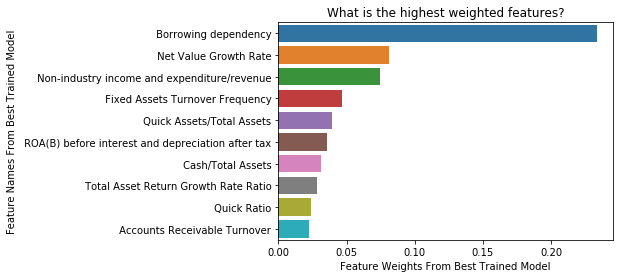

In [22]:
# Visualizing the weights for the base dataset
plot_top_ten_features(get_ten_most_important_features(trained_models, bankrupt_df))

# First iteration <a class="anchor" id="Iter2"></a>
So, I have noticed with working with a few other datasets, and it was also apperent with money features that they are often on a logrithmic scale. This means that we should convert it to normal distribution before modeling. Then with that, noticing if that metric will change the classification results for those models. 

First step would be looking over the distributions from before, and noticing if any of them have particularly lognormal distributions so we can convert those datasets to lognormal. This will allow metrics that are linear in nature to help with determining the relationship to bankruptcy. This would potentially increase the results from the logistic regression model, and providing the decision tree models with a smaller range to provide splits on. 

 Revenue Per Share (Yuan ¥)


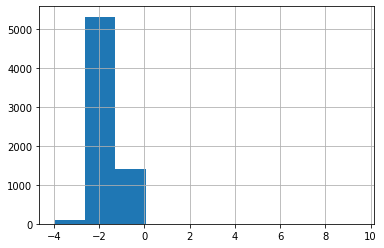

 Operating Profit Per Share (Yuan ¥)


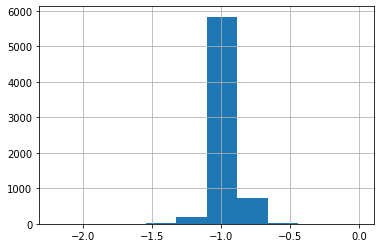

 Per Share Net profit before tax (Yuan ¥)


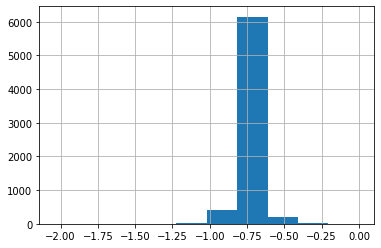

In [23]:
# Preparing the data for the first iteration by checking if the unit that the data is measured in is in the currency for the country. 
# then converting the column to a log 10 
iteration_1_df = bankrupt_df.copy()
for column in iteration_1_df.columns: 
    if 'Yuan' in column:
        print(column)
        iteration_1_df['log10_{}'.format(column)] = iteration_1_df[column].apply(lambda x: math.log10(x) if x > 0 else x)
        hist = iteration_1_df['log10_{}'.format(column)].hist()
        iteration_1_df = iteration_1_df.drop(column, axis=1)
        plt.show()

In [24]:
# training the models with the data from the second iteration
iter_1_trained_models = train_all_models(iteration_1_df, model_output_path_iteration_two)

Model LogisticRegression exists at filepath ./models/iter_two_LogisticRegression.pkl.
Model DecisionTreeClassifier exists at filepath ./models/iter_two_DecisionTreeClassifier.pkl.
Model RandomForestClassifier exists at filepath ./models/iter_two_RandomForestClassifier.pkl.
Model SVC exists at filepath ./models/iter_two_SVC.pkl.
Model GradientBoostingClassifier exists at filepath ./models/iter_two_GradientBoostingClassifier.pkl.


LogisticRegression


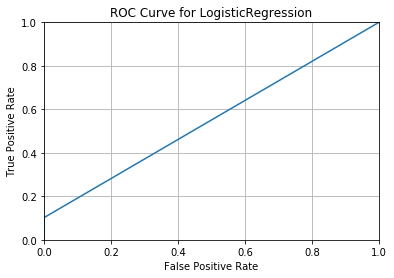

Confusion Matrix: 
[[1967    1]
 [  70    8]]
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.89      0.10      0.18        78

    accuracy                           0.97      2046
   macro avg       0.93      0.55      0.58      2046
weighted avg       0.96      0.97      0.95      2046




DecisionTreeClassifier


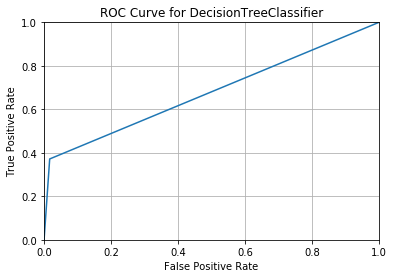

Confusion Matrix: 
[[1935   33]
 [  49   29]]
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1968
           1       0.47      0.37      0.41        78

    accuracy                           0.96      2046
   macro avg       0.72      0.68      0.70      2046
weighted avg       0.96      0.96      0.96      2046




RandomForestClassifier


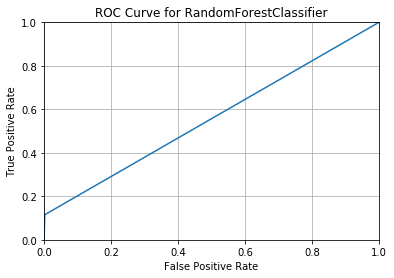

Confusion Matrix: 
[[1964    4]
 [  69    9]]
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.69      0.12      0.20        78

    accuracy                           0.96      2046
   macro avg       0.83      0.56      0.59      2046
weighted avg       0.96      0.96      0.95      2046




SVC


C:\Users\eliel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\eliel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


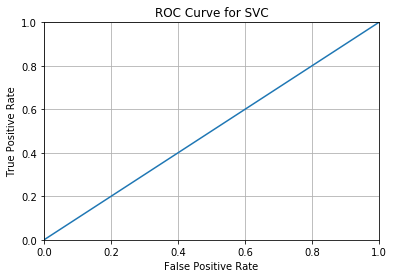

Confusion Matrix: 
[[1968    0]
 [  78    0]]
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1968
           1       0.00      0.00      0.00        78

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.93      0.96      0.94      2046




GradientBoostingClassifier


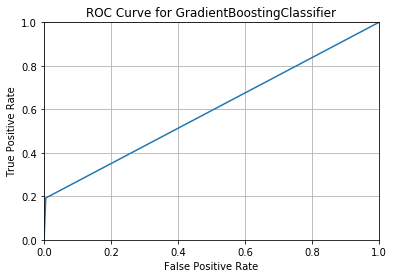

Confusion Matrix: 
[[1958   10]
 [  63   15]]
Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.60      0.19      0.29        78

    accuracy                           0.96      2046
   macro avg       0.78      0.59      0.64      2046
weighted avg       0.95      0.96      0.96      2046






In [25]:
# splitting and evaluating the models
X_train, X_test, y_train, y_test = get_split(iteration_1_df)
iteration_1_report = evaluate_model(X_test, y_test, iter_1_trained_models)

In [26]:
# What are the raw feature weights for the second iteration? 
get_ten_most_important_features(iter_1_trained_models, iteration_1_df)

,featureNames,featureWeight
36,Borrowing dependency,0.227155
26,Net Value Growth Rate,0.081092
8,Non-industry income and expenditure/revenue,0.077993
2,ROA(B) before interest and depreciation after...,0.035842
45,Fixed Assets Turnover Frequency,0.035626
51,Quick Assets/Total Assets,0.031385
53,Cash/Total Assets,0.030937
27,Total Asset Return Growth Rate Ratio,0.023796
76,Cash Flow to Total Assets,0.021416
13,Interest-bearing debt interest rate,0.021353


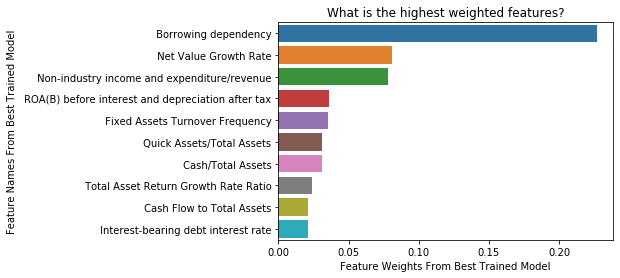

In [27]:
# Plot the weights from the table above to visualize how they look
plot_top_ten_features(get_ten_most_important_features(iter_1_trained_models, iteration_1_df))

Just like with the first pass through with modeling, the F1-Score improved again with the decision tree model. Interesting that with the parameters of the decision tree, it is still the same result as before, showing that decision tree is proving to be the best model. <br>
What is interesting about this iteration is that the top feature weights have not changed in the datasets. Which is very interesting for this iteration, becuase this iteration didn't change any of the features in the top 10, but this effect didn't change those features enough. <br> 
There is one last iteration that I would like to do as well, and this one is taking the previous iteration to the max, and seeing what features have a logistic distribution and transform those features before modeling. This iteration is more subjecto to my opinion on what is a "lognormal distribution" but this list can be found in the constants file of features I felt were lognormally distributed. This iteration consisted of a large breath of features I felt were lognormal, but in another iteration I will be a little more selective in features that are included.<br>

# Second iteration <a class="anchor" id="Iter3"></a>

In [28]:
# how many features appeared to be lognormal
len(constants.log_normal_features)

54

 Interest-bearing debt interest rate


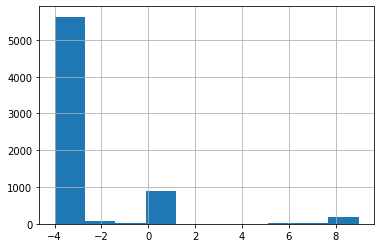

 Tax rate (A)


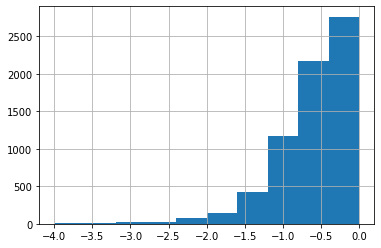

 Net Value Per Share (B)


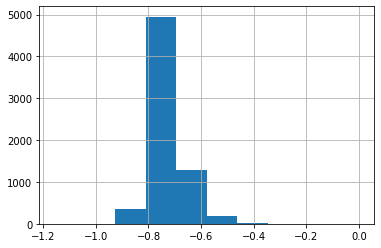

 Net Value Per Share (A)


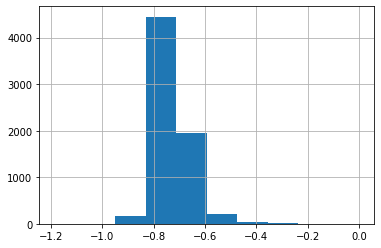

 Net Value Per Share (C)


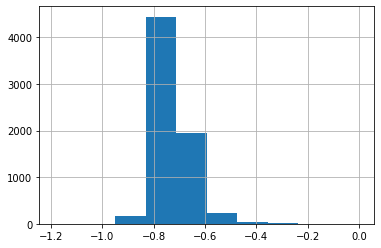

 Persistent EPS in the Last Four Seasons


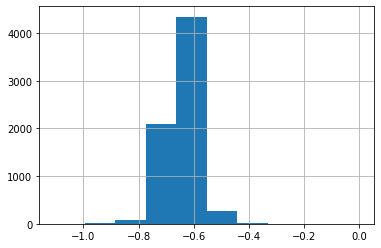

 Cash Flow Per Share


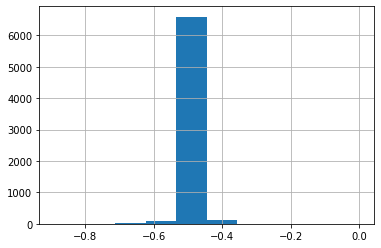

 Revenue Per Share (Yuan ¥)


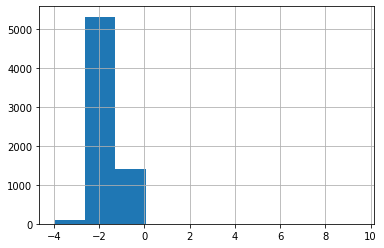

 Operating Profit Per Share (Yuan ¥)


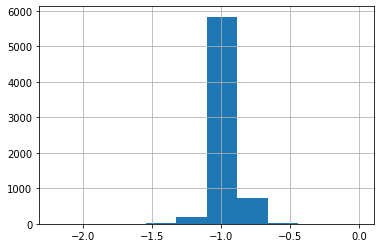

 Per Share Net profit before tax (Yuan ¥)


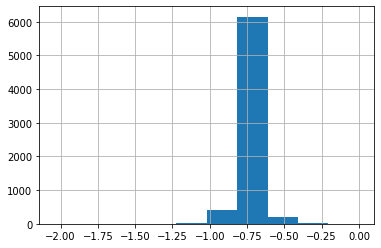

 Realized Sales Gross Profit Growth Rate


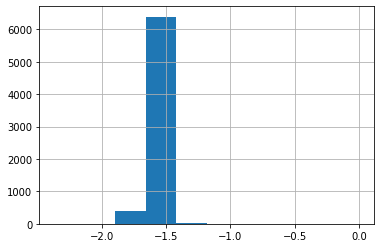

 Continuous Net Profit Growth Rate


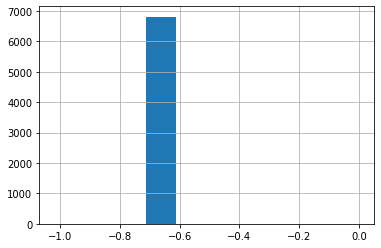

 Net Value Growth Rate


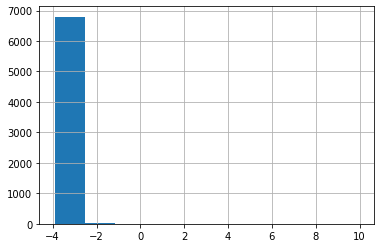

 Total Asset Return Growth Rate Ratio


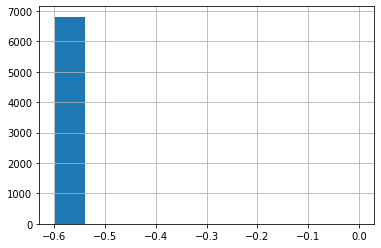

 Cash Reinvestment %


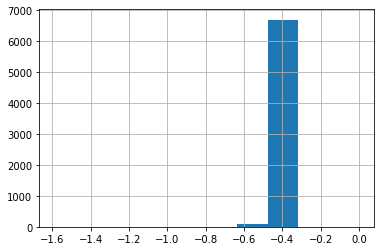

 Current Ratio


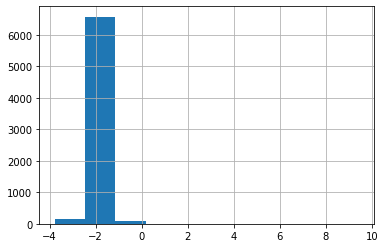

 Quick Ratio


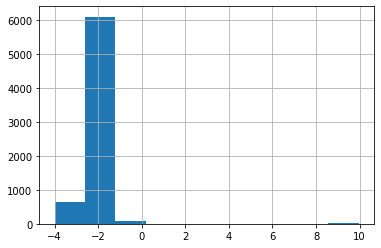

 Total debt/Total net worth


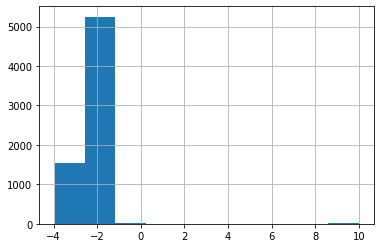

 Debt ratio %


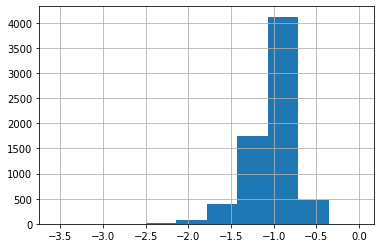

 Long-term fund suitability ratio (A)


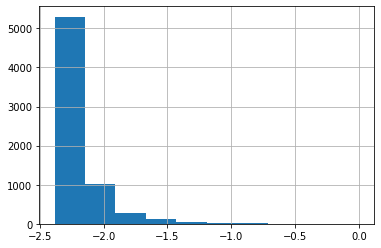

 Borrowing dependency


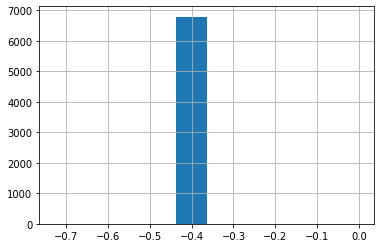

 Contingent liabilities/Net worth


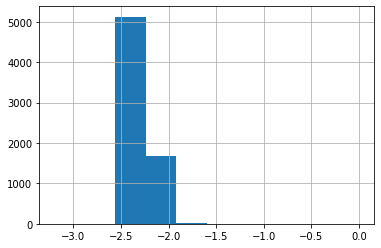

 Operating profit/Paid-in capital


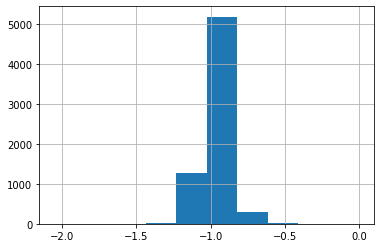

 Net profit before tax/Paid-in capital


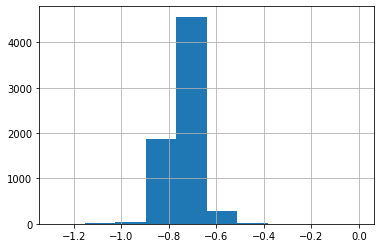

 Inventory and accounts receivable/Net value


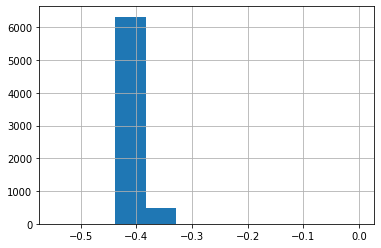

 Total Asset Turnover


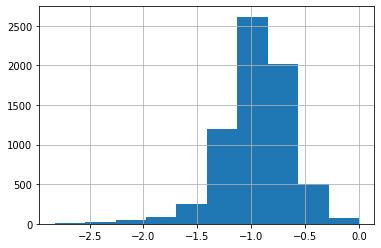

 Accounts Receivable Turnover


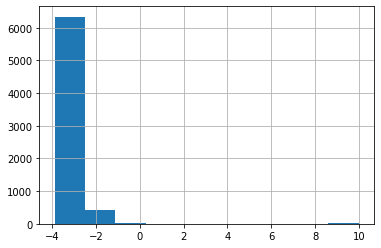

 Average Collection Days


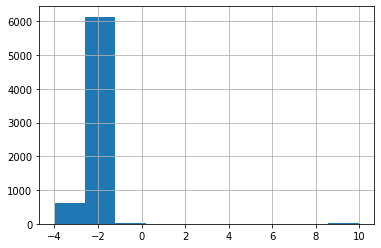

 Inventory Turnover Rate (times)


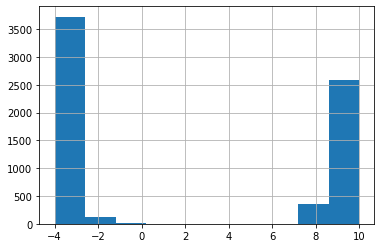

 Net Worth Turnover Rate (times)


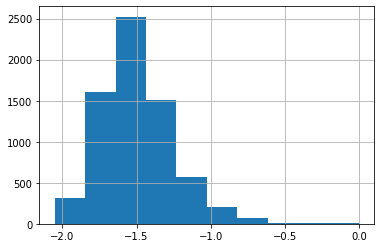

 Revenue per person


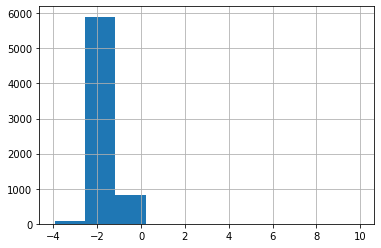

 Operating profit per person


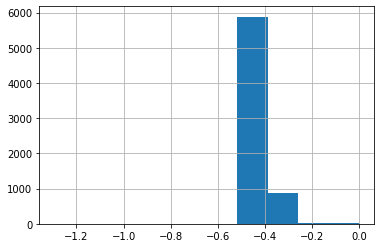

 Allocation rate per person


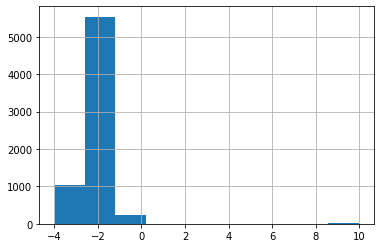

 Cash/Total Assets


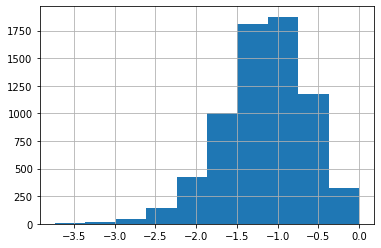

 Quick Assets/Current Liability


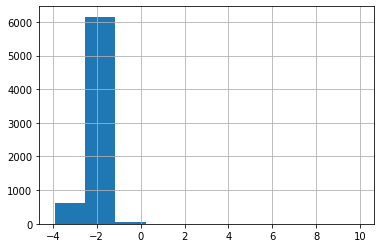

 Cash/Current Liability


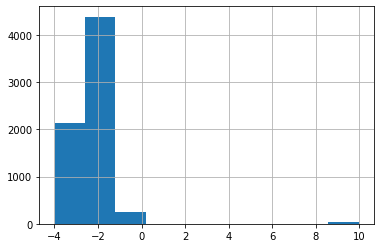

 Current Liability to Assets


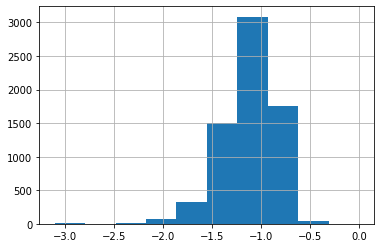

 Operating Funds to Liability


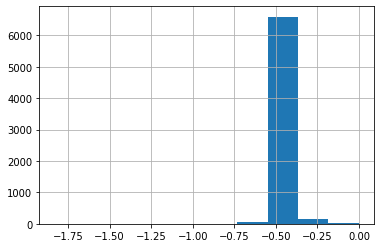

 Inventory/Working Capital


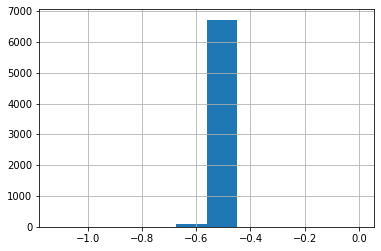

 Current Liabilities/Equity


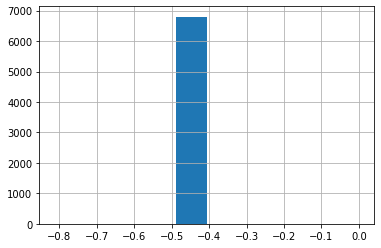

 Long-term Liability to Current Assets


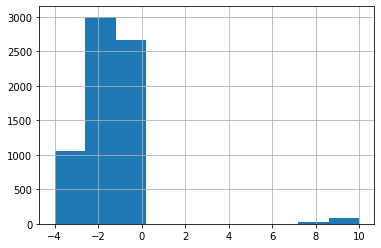

 Total income/Total expense


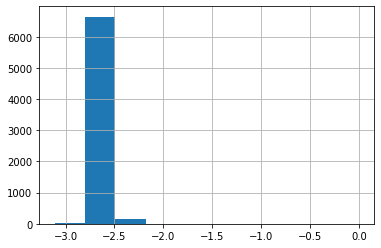

 Total expense/Assets


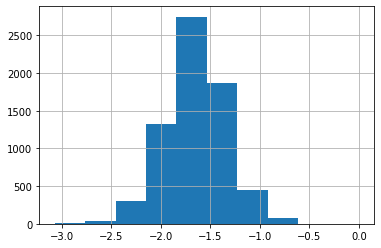

 Fixed Assets to Assets


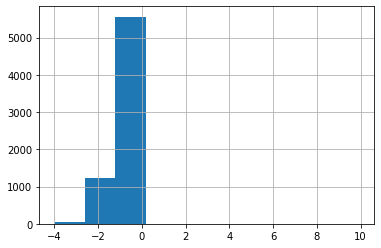

 Current Liability to Equity


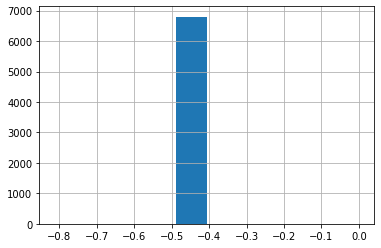

 Equity to Long-term Liability


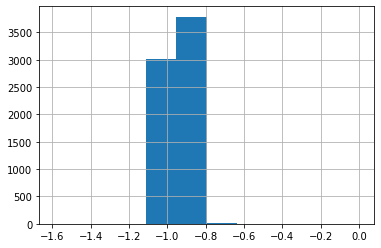

 Liability-Assets Flag


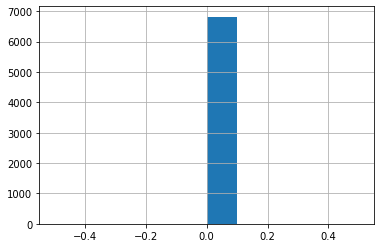

 Total assets to GNP price


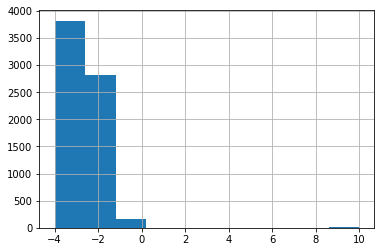

 Liability to Equity


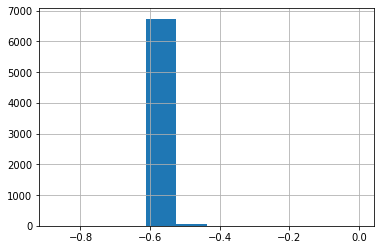

 Degree of Financial Leverage (DFL)


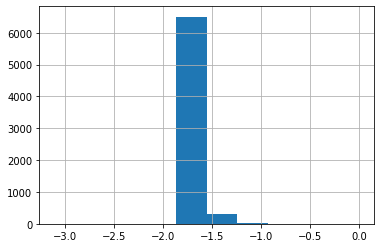

 Equity to Liability


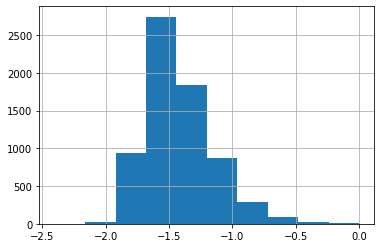

In [29]:
# generating the dataset by iterating over the features whose distribution look lognormal
iteration_2_df = bankrupt_df.copy()
for column in iteration_2_df.columns: 
    if column in constants.log_normal_features:
        print(column)
        iteration_2_df['log10_{}'.format(column)] = iteration_2_df[column].apply(lambda x: math.log10(x) if x > 0 else x)
        hist = iteration_2_df['log10_{}'.format(column)].hist()
        iteration_2_df = iteration_2_df.drop(column, axis=1)
        plt.show()

In [30]:
# train the models again for the third iteration
iter_2_trained_models = train_all_models(iteration_2_df, model_output_path_iteration_three)

Model LogisticRegression exists at filepath ./models/iter_three_LogisticRegression.pkl.
Model DecisionTreeClassifier exists at filepath ./models/iter_three_DecisionTreeClassifier.pkl.
Model RandomForestClassifier exists at filepath ./models/iter_three_RandomForestClassifier.pkl.
Model SVC exists at filepath ./models/iter_three_SVC.pkl.
Model GradientBoostingClassifier exists at filepath ./models/iter_three_GradientBoostingClassifier.pkl.


LogisticRegression


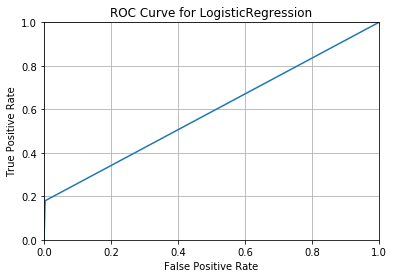

Confusion Matrix: 
[[1962    6]
 [  64   14]]
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.70      0.18      0.29        78

    accuracy                           0.97      2046
   macro avg       0.83      0.59      0.63      2046
weighted avg       0.96      0.97      0.96      2046




DecisionTreeClassifier


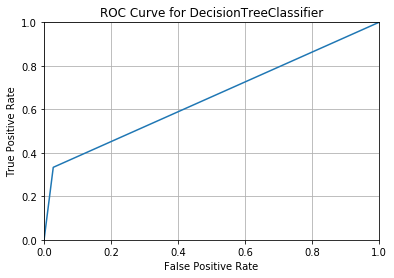

Confusion Matrix: 
[[1914   54]
 [  52   26]]
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1968
           1       0.33      0.33      0.33        78

    accuracy                           0.95      2046
   macro avg       0.65      0.65      0.65      2046
weighted avg       0.95      0.95      0.95      2046




RandomForestClassifier


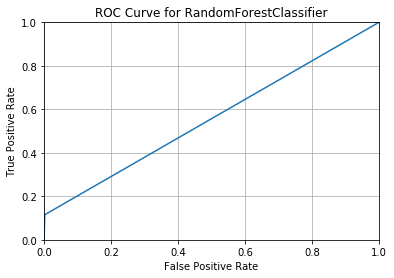

Confusion Matrix: 
[[1964    4]
 [  69    9]]
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.69      0.12      0.20        78

    accuracy                           0.96      2046
   macro avg       0.83      0.56      0.59      2046
weighted avg       0.96      0.96      0.95      2046




SVC


C:\Users\eliel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\eliel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


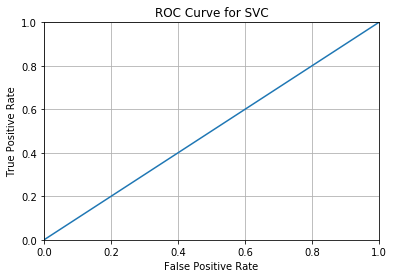

Confusion Matrix: 
[[1968    0]
 [  78    0]]
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1968
           1       0.00      0.00      0.00        78

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.93      0.96      0.94      2046




GradientBoostingClassifier


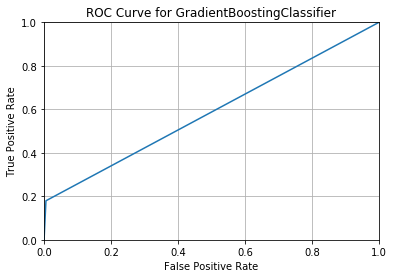

Confusion Matrix: 
[[1957   11]
 [  64   14]]
Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.56      0.18      0.27        78

    accuracy                           0.96      2046
   macro avg       0.76      0.59      0.63      2046
weighted avg       0.95      0.96      0.95      2046






In [31]:
# split and evaluate the models trained using the dataset for the third iteration
X_train, X_test, y_train, y_test = get_split(iteration_2_df)
iteration_2_reports = evaluate_model(X_test, y_test, iter_2_trained_models)

In [32]:
# list the 10 features with thier weights
get_ten_most_important_features(iter_1_trained_models, iteration_2_df)

,featureNames,featureWeight
36,Cash Flow to Equity,0.227155
26,Retained Earnings to Total Assets,0.081092
8,Non-industry income and expenditure/revenue,0.077993
2,ROA(B) before interest and depreciation after...,0.035842
45,log10_ Net Value Per Share (B),0.035626
51,log10_ Operating Profit Per Share (Yuan ¥),0.031385
53,log10_ Realized Sales Gross Profit Growth Rate,0.030937
27,Current Asset Turnover Rate,0.023796
76,log10_ Cash/Total Assets,0.021416
13,Operating Profit Growth Rate,0.021353


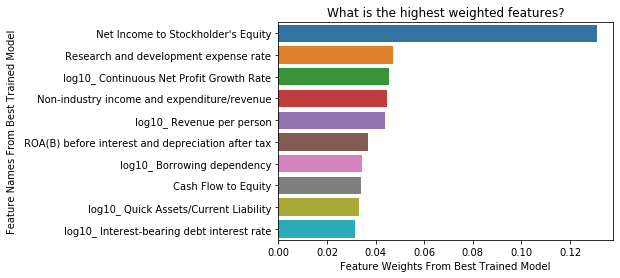

In [33]:
# Plot the top 10 features for the third iteration
plot_top_ten_features(get_ten_most_important_features(iter_2_trained_models, iteration_2_df))

This iteration is a very interesting change. This last change, made the F1 score drop in the results, and changed a lot of the main features significantly. Showing that this iteration wasn't as big of an improvement as one would hope. Once the factors have been logically changed, it changed the structure of the data enough, to where the top 10 factors changed quite a bit. Where in the first couple of iterations, then top 10 didn't change. The number of features that were changed in the second iteration was significant, and it is interesting that those iterations didn't change. <br> 
Makes me curious how the value weights changed over the iterations... 

# Results! <a class="anchor" id="IterationResults"></a>
# How did the feature weights change over each iteration?

In [34]:
# Creating and combinging the dataframes into something that we can visualize
# Loading in the data that we generated in the above modeling steps. 
first = get_ten_most_important_features(trained_models, bankrupt_df)
second = get_ten_most_important_features(iter_1_trained_models, iteration_1_df)
third = get_ten_most_important_features(iter_2_trained_models, iteration_2_df)
# Creating the iteration values to the datasets 
first['iterationNum'] = 1
second['iterationNum'] = 2
third['iterationNum'] = 3
# Combining and adjusting the dataset for the visuals below
all_iterations_df = pd.concat([first, second, third])
iterations_wide = all_iterations_df.pivot('iterationNum','featureNames','featureWeight')

Text(0.5, 1.0, 'How do feature weights change over the different iterations?')

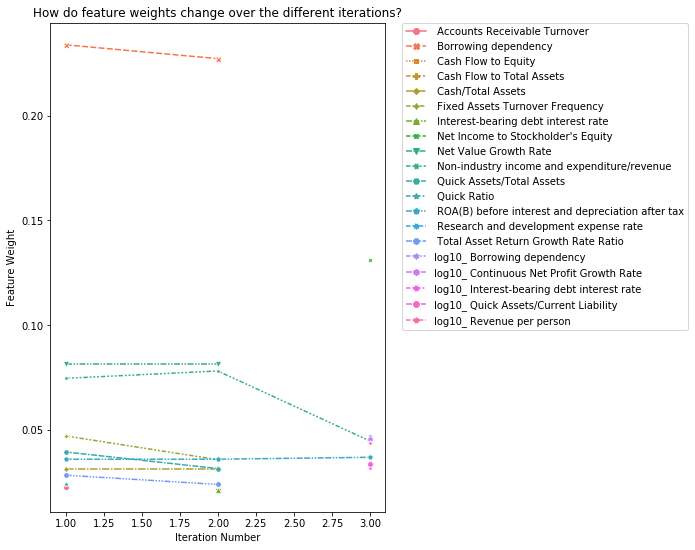

In [37]:
# creating a line plot of the features per iteration
fig_dims = (6, 9)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=iterations_wide, markers=True, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Iteration Number")
plt.ylabel("Feature Weight")
plt.title("How do feature weights change over the different iterations?")

Text(0.5, 1.0, 'How do feature weights change over the different iterations?')

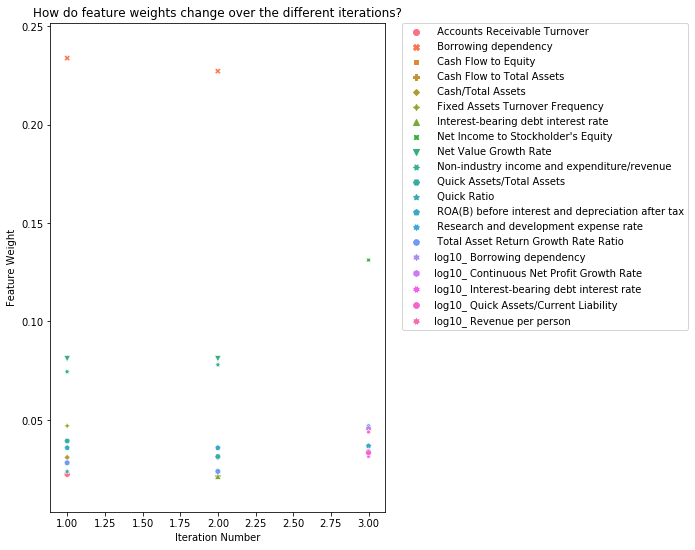

In [38]:
# Creating a scatter plot of the features per iteration
fig_dims = (6, 9)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=iterations_wide, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Iteration Number")
plt.ylabel("Feature Weight")
plt.title("How do feature weights change over the different iterations?")

# How does the models F1 scores compare each iteration? 

In [66]:
# Creating datasets for visualizing which modle performed the best overall
# Load in data that we have from above. 
first_results = pd.DataFrame(iteration_0_report, columns=['F1_Score'])
second_results = pd.DataFrame(iteration_1_report, columns=['F1_Score'])
third_results = pd.DataFrame(iteration_2_reports, columns=['F1_Score'])
# Load in model names to the dataset so we can change it for visualizations
first_results['ModelNames'] = constants.model_names
second_results['ModelNames'] = constants.model_names
third_results['ModelNames'] = constants.model_names
# Add in the iteration numbers 
first_results['IterationNum'] = 1
second_results['IterationNum'] = 2
third_results['IterationNum'] = 3
# Appending the three datasets together 
all_iterations_results_df = pd.concat([first_results, second_results, third_results])
iterations_results_wide = all_iterations_results_df.pivot('IterationNum','ModelNames','F1_Score')

Text(0.5, 1.0, 'How did F1 Scores change over the different iterations for each model?')

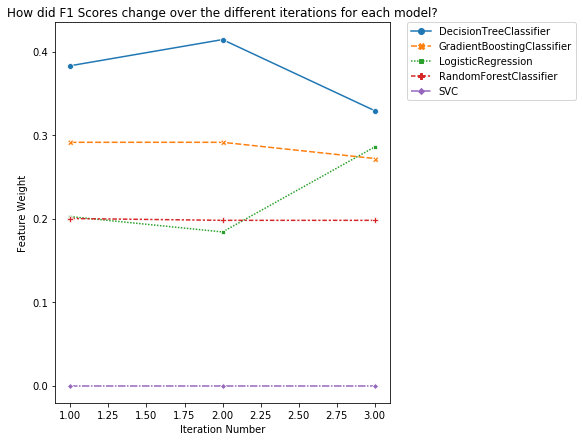

In [72]:
# Creating a line plot for how each model did over the various iterations. 
fig_dims = (6, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=iterations_results_wide, markers=True, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Iteration Number")
plt.ylabel("Feature Weight")
plt.title("How did F1 Scores change over the different iterations for each model?")

# Conclusions <a class="anchor" id="Conclusions"></a>

The main model that produced the best results was decision tree over the various iterations to the data. The SVC model didn't produce any results, most likely due to the number of iterations was set low enough to save on compute time. The main features that produced the best results from the various results are Borrowing dependency, Net Value Growth Rate, and Non-industry income and expenditure/revenue. 